In [1]:
!wget "https://media.githubusercontent.com/media/pradeep-016/ML_Course/refs/heads/main/6)%20Time%20Series%20Models/Exponential%20Smoothing/NFLX.csv"

--2024-12-10 09:40:18--  https://media.githubusercontent.com/media/pradeep-016/ML_Course/refs/heads/main/6)%20Time%20Series%20Models/Exponential%20Smoothing/NFLX.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74929 (73K) [text/plain]
Saving to: ‘NFLX.csv’

NFLX.csv            100%[===================>]  73.17K  --.-KB/s    in 0.02s   

2024-12-10 09:40:19 (3.30 MB/s) - ‘NFLX.csv’ saved [74929/74929]



In [2]:
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('NFLX.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [5]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace = True)
close_price = data['Close']

In [6]:
alpha = 0.2
model = SimpleExpSmoothing(close_price)
model_fit = model.fit(smoothing_level = alpha, optimized = False)
data['Smoothed'] = model_fit.fittedvalues

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [7]:
length = 60
forecast = model_fit.forecast(length)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [8]:
forecast_index = pd.date_range(start = data.index[-1]+ pd.Timedelta(days = 1),periods = length )
forecast_df = pd.DataFrame({'Date': forecast_index, 'Forecast': forecast.values})

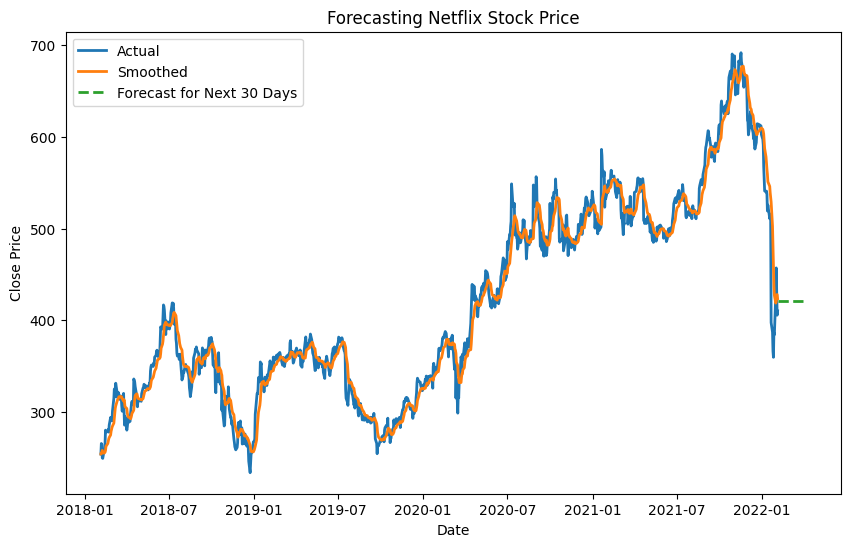

In [9]:
plt.figure(figsize = (10, 6))
plt.plot(data.index, data['Close'], label = 'Actual', linewidth = 2)
plt.plot(data.index, data['Smoothed'], label = 'Smoothed', linewidth = 2)
plt.plot(forecast_index, forecast.values, label = 'Forecast for Next 30 Days', linestyle = '--', linewidth = 2)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Forecasting Netflix Stock Price')
plt.legend()
plt.show()